## Preprocessing

In [55]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

# Install keras_tuner
!pip3 install -q -U keras-tuner
import keras_tuner as kt

#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [56]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(['EIN', 'NAME'], axis=1, inplace=True)
application_df.head(5)

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [57]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [58]:
# Look at APPLICATION_TYPE value counts for binning
app_type_count_df = application_df['APPLICATION_TYPE'].value_counts()
app_type_count_df

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [59]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = list(app_type_count_df[app_type_count_df < 500].index)

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [60]:
# Look at CLASSIFICATION value counts for binning
classification = application_df['CLASSIFICATION'].value_counts()
classification

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [61]:
# You may find it helpful to look at CLASSIFICATION value counts >1
class_value = classification.loc[classification > 1]
class_value

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64

In [62]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = list(class_value[class_value < 1000].index)
# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2235
C3000     1918
C2100     1883
C1370        1
C1236        1
C2190        1
C4200        1
C5200        1
C1248        1
C2600        1
C1580        1
C6100        1
C1820        1
C1900        1
C2570        1
C1570        1
C3700        1
C2500        1
C1283        1
C2380        1
C1732        1
C1728        1
C2170        1
C4120        1
C8210        1
C4500        1
C1245        1
C2561        1
C2150        1
Name: CLASSIFICATION, dtype: int64

In [63]:
# Get info on application_df
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   APPLICATION_TYPE        34299 non-null  object
 1   AFFILIATION             34299 non-null  object
 2   CLASSIFICATION          34299 non-null  object
 3   USE_CASE                34299 non-null  object
 4   ORGANIZATION            34299 non-null  object
 5   STATUS                  34299 non-null  int64 
 6   INCOME_AMT              34299 non-null  object
 7   SPECIAL_CONSIDERATIONS  34299 non-null  object
 8   ASK_AMT                 34299 non-null  int64 
 9   IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 2.6+ MB


In [64]:
# Select all categorical fields using select_dtypes
categorical_fields = application_df.select_dtypes(include=['object']).columns.tolist()

# Inspect result
categorical_fields

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [65]:
# Convert categorical data to numeric with `pd.get_dummies`
dummies_df = pd.get_dummies(application_df)
dummies_df

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1,5000,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
34295,1,5000,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
34296,1,5000,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34297,1,5000,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [66]:
dummies_df.STATUS.value_counts()

1    34294
0        5
Name: STATUS, dtype: int64

In [67]:
# Get the column names
feature_columns = dummies_df.drop(columns=['IS_SUCCESSFUL']).columns

In [68]:
# Split our preprocessed data into our features and target arrays
# X = dummies_df.drop(columns=['IS_SUCCESSFUL'], axis=1).values
#feature_columns = dummies_df.drop(columns=['IS_SUCCESSFUL'])
X = dummies_df.drop(columns=['IS_SUCCESSFUL', 'STATUS'])
y = dummies_df['IS_SUCCESSFUL']

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=58)

In [69]:
X.columns

Index(['ASK_AMT', 'APPLICATION_TYPE_Other', 'APPLICATION_TYPE_T10',
       'APPLICATION_TYPE_T19', 'APPLICATION_TYPE_T3', 'APPLICATION_TYPE_T4',
       'APPLICATION_TYPE_T5', 'APPLICATION_TYPE_T6', 'APPLICATION_TYPE_T7',
       'APPLICATION_TYPE_T8', 'AFFILIATION_CompanySponsored',
       'AFFILIATION_Family/Parent', 'AFFILIATION_Independent',
       'AFFILIATION_National', 'AFFILIATION_Other', 'AFFILIATION_Regional',
       'CLASSIFICATION_C1000', 'CLASSIFICATION_C1200', 'CLASSIFICATION_C1236',
       'CLASSIFICATION_C1245', 'CLASSIFICATION_C1248', 'CLASSIFICATION_C1283',
       'CLASSIFICATION_C1370', 'CLASSIFICATION_C1570', 'CLASSIFICATION_C1580',
       'CLASSIFICATION_C1728', 'CLASSIFICATION_C1732', 'CLASSIFICATION_C1820',
       'CLASSIFICATION_C1900', 'CLASSIFICATION_C2000', 'CLASSIFICATION_C2100',
       'CLASSIFICATION_C2150', 'CLASSIFICATION_C2170', 'CLASSIFICATION_C2190',
       'CLASSIFICATION_C2380', 'CLASSIFICATION_C2500', 'CLASSIFICATION_C2561',
       'CLASSIFICATION_C2

In [70]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [71]:
# Use a Random Forest model to determine feature importance
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X_train_scaled, y_train)

# Create feature importance dataframe to analyze etc.
fi_values = rf.feature_importances_
features = X.columns

# Create df
feature_importance_df = pd.DataFrame({"feature": features, "feature_importance": fi_values})

feature_importance_df = feature_importance_df.sort_values(by="feature_importance", ascending = False)

feature_importance_df

,feature,feature_importance
0,ASK_AMT,0.404784
12,AFFILIATION_Independent,0.141711
10,AFFILIATION_CompanySponsored,0.116777
53,ORGANIZATION_Association,0.032146
6,APPLICATION_TYPE_T5,0.022858
...,...,...
35,CLASSIFICATION_C2500,0.000000
37,CLASSIFICATION_C2570,0.000000
18,CLASSIFICATION_C1236,0.000000
42,CLASSIFICATION_C4200,0.000000


In [72]:
# Get summary statistics for feature_importances
feature_importance_df.describe()

,feature_importance
count,68.000000
mean,0.014706
std,0.053010
min,0.000000
25%,0.000023
50%,0.001298
75%,0.009127
max,0.404784


In [73]:
# Set cutoff value to 50% percentile of feature_importance distribution (.005114)

important_features = feature_importance_df.loc[feature_importance_df["feature_importance"] >= .005114, "feature"].tolist()

important_features

['ASK_AMT',
 'AFFILIATION_Independent',
 'AFFILIATION_CompanySponsored',
 'ORGANIZATION_Association',
 'APPLICATION_TYPE_T5',
 'APPLICATION_TYPE_T10',
 'APPLICATION_TYPE_T4',
 'ORGANIZATION_Trust',
 'APPLICATION_TYPE_T19',
 'CLASSIFICATION_C2100',
 'CLASSIFICATION_Other',
 'CLASSIFICATION_C2000',
 'APPLICATION_TYPE_T3',
 'CLASSIFICATION_C1000',
 'USE_CASE_ProductDev',
 'APPLICATION_TYPE_T6',
 'INCOME_AMT_0',
 'CLASSIFICATION_C1200',
 'USE_CASE_Preservation',
 'CLASSIFICATION_C3000',
 'INCOME_AMT_25000-99999',
 'INCOME_AMT_1M-5M',
 'INCOME_AMT_1-9999',
 'INCOME_AMT_100000-499999',
 'APPLICATION_TYPE_T8']

In [74]:
# Define a refined subset of feature training and test sets with important_features
X2_train = X_train[important_features]

X2_test = X_test[important_features]

# Inspect info
X2_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25724 entries, 17404 to 6688
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   ASK_AMT                       25724 non-null  int64
 1   AFFILIATION_Independent       25724 non-null  uint8
 2   AFFILIATION_CompanySponsored  25724 non-null  uint8
 3   ORGANIZATION_Association      25724 non-null  uint8
 4   APPLICATION_TYPE_T5           25724 non-null  uint8
 5   APPLICATION_TYPE_T10          25724 non-null  uint8
 6   APPLICATION_TYPE_T4           25724 non-null  uint8
 7   ORGANIZATION_Trust            25724 non-null  uint8
 8   APPLICATION_TYPE_T19          25724 non-null  uint8
 9   CLASSIFICATION_C2100          25724 non-null  uint8
 10  CLASSIFICATION_Other          25724 non-null  uint8
 11  CLASSIFICATION_C2000          25724 non-null  uint8
 12  APPLICATION_TYPE_T3           25724 non-null  uint8
 13  CLASSIFICATION_C1000        

In [75]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X2_train)

# Scale the data
X2_train_scaled = X_scaler.transform(X2_train)
X2_test_scaled = X_scaler.transform(X2_test)

## Compile, Train and Evaluate the Model

### First Version (pre feature importance eval)

In [76]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
input_features = len(X_train_scaled[0])

### Hidden_values 80, 40,10

nn_model = tf.keras.models.Sequential()

# First hidden layer
nn_model.add(tf.keras.layers.Dense(units=80, activation="relu", input_dim=input_features))

# # Add dropout layer
nn_model.add(tf.keras.layers.Dropout(.25))

# Second hidden layer
nn_model.add(tf.keras.layers.Dense(units=40, activation="relu"))

# Third hidden layer
nn_model.add(tf.keras.layers.Dense(units=10, activation="relu"))

# Output layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
# Check the structure of the model
nn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 80)                5520      
                                                                 
 dropout_1 (Dropout)         (None, 80)                0         
                                                                 
 dense_10 (Dense)            (None, 40)                3240      
                                                                 
 dense_11 (Dense)            (None, 10)                410       
                                                                 
 dense_12 (Dense)            (None, 1)                 11        
                                                                 
Total params: 9181 (35.86 KB)
Trainable params: 9181 (35.86 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [77]:
# Compile the model
# custom_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [78]:
# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
804/804 [==============================] - 7s 6ms/step - loss: 0.5863 - accuracy: 0.7110
Epoch 2/30
804/804 [==============================] - 6s 7ms/step - loss: 0.5618 - accuracy: 0.7268
Epoch 3/30
804/804 [==============================] - 4s 5ms/step - loss: 0.5585 - accuracy: 0.7283
Epoch 4/30
804/804 [==============================] - 7s 9ms/step - loss: 0.5566 - accuracy: 0.7299
Epoch 5/30
804/804 [==============================] - 6s 8ms/step - loss: 0.5547 - accuracy: 0.7292
Epoch 6/30
804/804 [==============================] - 5s 6ms/step - loss: 0.5549 - accuracy: 0.7292
Epoch 7/30
804/804 [==============================] - 3s 4ms/step - loss: 0.5540 - accuracy: 0.7311
Epoch 8/30
804/804 [==============================] - 3s 4ms/step - loss: 0.5534 - accuracy: 0.7319
Epoch 9/30
804/804 [==============================] - 3s 4ms/step - loss: 0.5519 - accuracy: 0.7306
Epoch 10/30
804/804 [==============================] - 3s 3ms/step - loss: 0.5522 - accuracy: 0.7304

In [79]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5503 - accuracy: 0.7305 - 484ms/epoch - 2ms/step
Loss: 0.5502701997756958, Accuracy: 0.7304956316947937


# Version II - post feature selection

In [80]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
input_features = len(X2_train_scaled[0])

### Hidden_values 110, 80,10


nn_model = tf.keras.models.Sequential()

# First hidden layer
nn_model.add(tf.keras.layers.Dense(units=110, activation="relu", input_dim=input_features))

# Add dropout layer
nn_model.add(tf.keras.layers.Dropout(.25))

# Second hidden layer
nn_model.add(tf.keras.layers.Dense(units=80, activation="relu"))

# Add dropout layer
nn_model.add(tf.keras.layers.Dropout(.5))

# Third hidden layer
nn_model.add(tf.keras.layers.Dense(units=10, activation="relu"))

# Add dropout layer
nn_model.add(tf.keras.layers.Dropout(.5))

# Fourth hidden layer
#nn_model.add(tf.keras.layers.Dense(units=40, activation="sigmoid"))

# Fifth hidden layer
#nn_model.add(tf.keras.layers.Dense(units=10, activation="sigmoid"))

# Output layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
# Check the structure of the model
nn_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 110)               2860      
                                                                 
 dropout_2 (Dropout)         (None, 110)               0         
                                                                 
 dense_14 (Dense)            (None, 80)                8880      
                                                                 
 dropout_3 (Dropout)         (None, 80)                0         
                                                                 
 dense_15 (Dense)            (None, 10)                810       
                                                                 
 dropout_4 (Dropout)         (None, 10)                0         
                                                                 
 dense_16 (Dense)            (None, 1)                

In [81]:
# Compile the model
#custom_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [82]:
# Train the model
fit_model = nn_model.fit(X2_train_scaled, y_train, epochs=30)

Epoch 1/30
804/804 [==============================] - 3s 2ms/step - loss: 0.6261 - accuracy: 0.6696
Epoch 2/30
804/804 [==============================] - 2s 2ms/step - loss: 0.5971 - accuracy: 0.7093
Epoch 3/30
804/804 [==============================] - 2s 2ms/step - loss: 0.5897 - accuracy: 0.7131
Epoch 4/30
804/804 [==============================] - 2s 2ms/step - loss: 0.5865 - accuracy: 0.7159
Epoch 5/30
804/804 [==============================] - 3s 3ms/step - loss: 0.5845 - accuracy: 0.7170
Epoch 6/30
804/804 [==============================] - 3s 4ms/step - loss: 0.5828 - accuracy: 0.7158
Epoch 7/30
804/804 [==============================] - 3s 3ms/step - loss: 0.5796 - accuracy: 0.7190
Epoch 8/30
804/804 [==============================] - 2s 2ms/step - loss: 0.5763 - accuracy: 0.7187
Epoch 9/30
804/804 [==============================] - 2s 3ms/step - loss: 0.5787 - accuracy: 0.7205
Epoch 10/30
804/804 [==============================] - 3s 3ms/step - loss: 0.5804 - accuracy: 0.7212

In [83]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X2_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5530 - accuracy: 0.7282 - 688ms/epoch - 3ms/step
Loss: 0.5529764890670776, Accuracy: 0.7281632423400879


# Version III

In [84]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
input_features = len(X2_train_scaled[0])


# Create a method that creates a new Sequential model with hyperparameter tuning
def create_model(hp):
  nn_model = tf.keras.models.Sequential()

  # Allow kerastuner to decide which activation function to use in hidden layers
  activation = hp.Choice('activation', ['relu', 'tanh'])

  # Allow kerastuner to decide number of neurons in first layer
  nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
                                                  min_value=1,
                                                  max_value=100,
                                                  step=5),
                                     activation=activation, input_dim=input_features))
  # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
  for i in range(hp.Int('num_layers', 1, 5)):
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
                                                    min_value=1,
                                                    max_value=40,
                                                    step=5),
                                       activation=activation))

  nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

  # Compile the model
  nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])

  return nn_model

In [85]:
# Create Hyperband tuner with kt
tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=10,
    hyperband_iterations=2)

In [86]:
# Run the kerastuner search for best hyperparameters
tuner.search(X2_train_scaled,y_train,epochs=30,validation_data=(X2_test_scaled,y_test))

Trial 60 Complete [00h 00m 27s]
val_accuracy: 0.7286297082901001

Best val_accuracy So Far: 0.7320116758346558
Total elapsed time: 00h 16m 00s


In [87]:
# Get best hyperparameters
best_hyper = tuner.get_best_hyperparameters(2)[0]
best_hyper.values

{'activation': 'relu',
 'first_units': 66,
 'num_layers': 2,
 'units_0': 26,
 'units_1': 1,
 'units_2': 31,
 'units_3': 1,
 'units_4': 11,
 'tuner/epochs': 10,
 'tuner/initial_epoch': 4,
 'tuner/bracket': 2,
 'tuner/round': 2,
 'tuner/trial_id': '0012'}

In [88]:
# Get the best model from the tuner
best_model = tuner.get_best_models(1)[0]

# Evaluate the best model against the test dataset
loss, accuracy = best_model.evaluate(X2_test_scaled, y_test)

print(f"Loss: {loss}, Accuracy: {accuracy}")

268/268 [==============================] - 1s 2ms/step - loss: 0.5667 - accuracy: 0.7320
Loss: 0.5667351484298706, Accuracy: 0.7320116758346558


# Keep NAME

In [89]:
# Read in application df
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")

# Add the NAME column to features
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(["EIN"], axis=1)

In [90]:
# Look at APPLICATION_TYPE value counts for binning
app_type_count_df = application_df["APPLICATION_TYPE"].value_counts()
app_type_count_df

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [91]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = list(app_type_count_df[app_type_count_df < 500].index)

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

In [92]:
# Look at CLASSIFICATION value counts for binning
classification = application_df["CLASSIFICATION"].value_counts()

classification

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

(-10.0, 10.0)

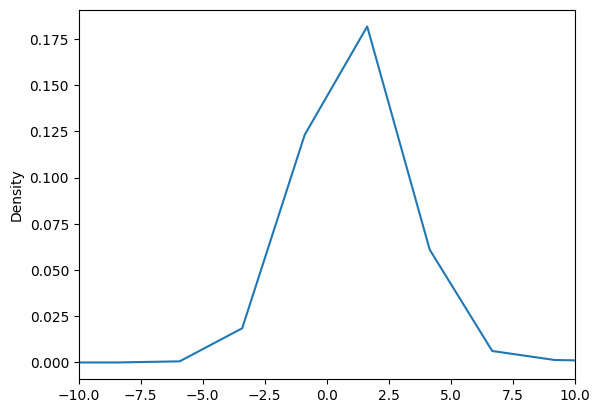

In [93]:
import matplotlib.pyplot as plt

# Inspect NAME column
app_name_vc = application_df.NAME.value_counts()

app_name_vc.plot.density()

plt.xlim(left=-10, right=10)

In [94]:
# Find out how many names occur more than 50 times
common_names = app_name_vc[app_name_vc >= 50]

print(common_names)
print(f"There are {common_names.count()} that appear 50 or more times in the dataset.")

PARENT BOOSTER USA INC                                                1260
TOPS CLUB INC                                                          765
UNITED STATES BOWLING CONGRESS INC                                     700
WASHINGTON STATE UNIVERSITY                                            492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                        408
PTA TEXAS CONGRESS                                                     368
SOROPTIMIST INTERNATIONAL OF THE AMERICAS INC                          331
ALPHA PHI SIGMA                                                        313
TOASTMASTERS INTERNATIONAL                                             293
MOST WORSHIPFUL STRINGER FREE AND ACCEPTED MASONS                      287
LITTLE LEAGUE BASEBALL INC                                             277
INTERNATIONAL ASSOCIATION OF LIONS CLUBS                               266
MOMS CLUB                                                              210
INTERNATIONAL ASSOCIATION

In [95]:
# Replace NAME of observations with less than 50 count with "Other"
names_to_replace = app_name_vc[app_name_vc < 50].index

# Replace in dataframe
for name in names_to_replace:
    application_df['NAME'] = application_df['NAME'].replace(name,"Other")

In [96]:
application_df["NAME"].value_counts()

Other                                                                 24545
PARENT BOOSTER USA INC                                                 1260
TOPS CLUB INC                                                           765
UNITED STATES BOWLING CONGRESS INC                                      700
WASHINGTON STATE UNIVERSITY                                             492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                         408
PTA TEXAS CONGRESS                                                      368
SOROPTIMIST INTERNATIONAL OF THE AMERICAS INC                           331
ALPHA PHI SIGMA                                                         313
TOASTMASTERS INTERNATIONAL                                              293
MOST WORSHIPFUL STRINGER FREE AND ACCEPTED MASONS                       287
LITTLE LEAGUE BASEBALL INC                                              277
INTERNATIONAL ASSOCIATION OF LIONS CLUBS                                266
MOMS CLUB   

In [97]:
# Convert categorical data to numeric with `pd.get_dummies`
dummies_df = pd.get_dummies(application_df)

In [98]:
# Split our preprocessed data into our features and target arrays
X = dummies_df.drop(columns=['IS_SUCCESSFUL', 'STATUS'])
y = dummies_df['IS_SUCCESSFUL']

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=58)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [99]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
input_features = len(X_train_scaled[0])

### Hidden_values 80, 40,10

nn_model = tf.keras.models.Sequential()

# First hidden layer
#nn_model.add(tf.keras.layers.Dense(units=80, activation="relu", input_dim=_input_features))
nn_model.add(tf.keras.layers.Dense(units=80, activation="relu", input_dim=input_features))
# Add dropout layer
nn_model.add(tf.keras.layers.Dropout(.25))

# Second hidden layer
nn_model.add(tf.keras.layers.Dense(units=40, activation="relu"))

# Third layer
nn_model.add(tf.keras.layers.Dense(units=10, activation="relu"))

# Output layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 80)                12800     
                                                                 
 dropout (Dropout)           (None, 80)                0         
                                                                 
 dense_5 (Dense)             (None, 40)                3240      
                                                                 
 dense_6 (Dense)             (None, 10)                410       
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 16461 (64.30 KB)
Trainable params: 16461 (64.30 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [100]:
# Compile the model
#custom_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [101]:
# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
804/804 [==============================] - 4s 3ms/step - loss: 0.5217 - accuracy: 0.7409
Epoch 2/30
804/804 [==============================] - 2s 2ms/step - loss: 0.4871 - accuracy: 0.7602
Epoch 3/30
804/804 [==============================] - 2s 2ms/step - loss: 0.4798 - accuracy: 0.7645
Epoch 4/30
804/804 [==============================] - 2s 2ms/step - loss: 0.4782 - accuracy: 0.7650
Epoch 5/30
804/804 [==============================] - 2s 2ms/step - loss: 0.4762 - accuracy: 0.7674
Epoch 6/30
804/804 [==============================] - 2s 3ms/step - loss: 0.4755 - accuracy: 0.7663
Epoch 7/30
804/804 [==============================] - 3s 4ms/step - loss: 0.4746 - accuracy: 0.7663
Epoch 8/30
804/804 [==============================] - 3s 4ms/step - loss: 0.4729 - accuracy: 0.7678
Epoch 9/30
804/804 [==============================] - 2s 3ms/step - loss: 0.4724 - accuracy: 0.7685
Epoch 10/30
804/804 [==============================] - 2s 2ms/step - loss: 0.4718 - accuracy: 0.7692

In [102]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.4786 - accuracy: 0.7661 - 737ms/epoch - 3ms/step
Loss: 0.47856196761131287, Accuracy: 0.7660641670227051


In [103]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [104]:
# Navigate to Starter_Code folder
%cd /content/drive/MyDrive/Starter_Code

/content/drive/MyDrive/Starter_Code


In [105]:
# Export our model to HDF5 file
from keras.models import save_model

# Update the file path to your Google Drive folder
nn_model.save("AlphabetSoupCharity_Optimization.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [106]:
# Verify the save model
import os
os.listdir()

['C:',
 'AlphabetSoupCharity_Optimization.h5',
 'AlphabetSoupCharity.h5',
 'Starter_Code_Deep_Learning.ipynb',
 'StarterCode_Deep_Learning_Optimization.ipynb',
 'untitled_project']